File loaded successfully!
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4),

<ipython-input-11-7b3d4aeed0aa>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="viridis")


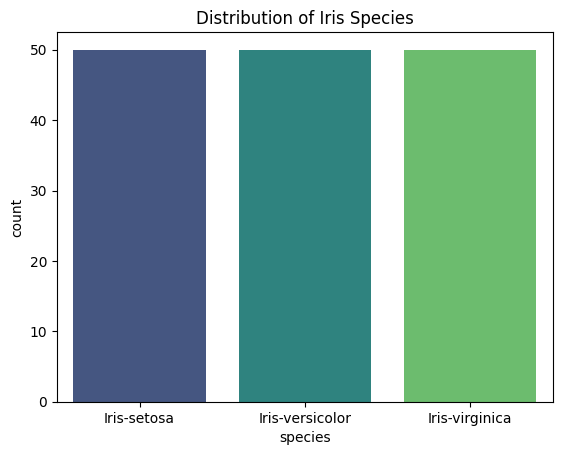

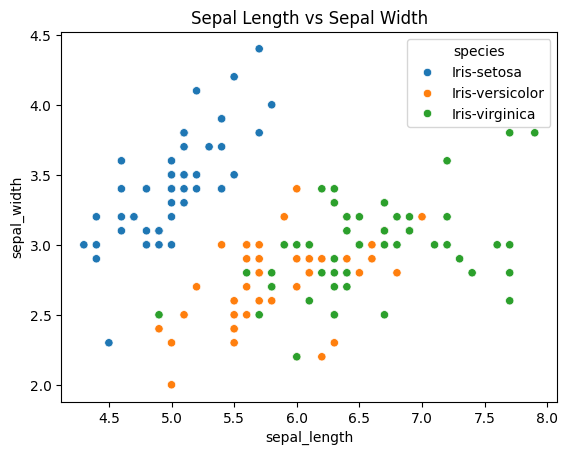


 Model Accuracy: 90.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



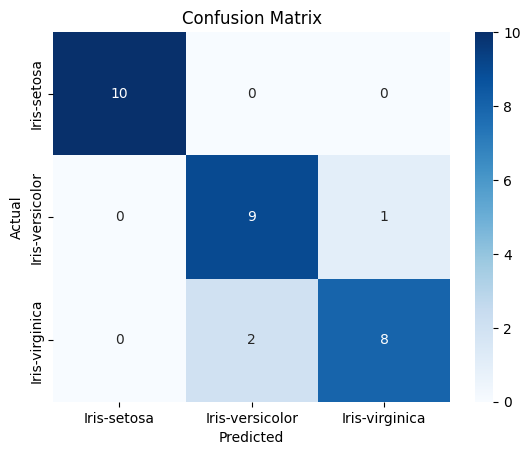

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



 Predicted species: ['Iris-setosa']


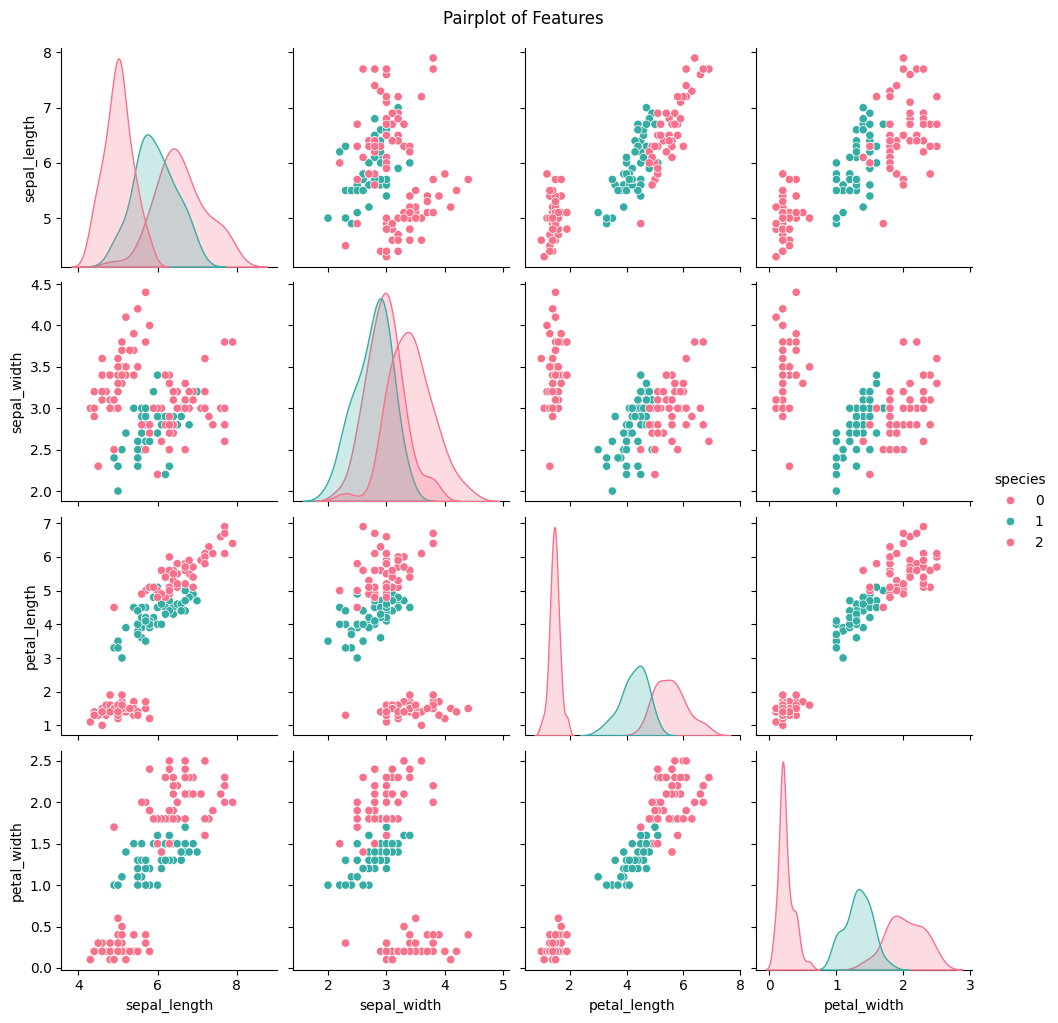

In [11]:
import pandas as pd

# Provide the path to the file on your Google Drive
file_path = "iris dataset.csv"

df = pd.read_csv(file_path)
print("File loaded successfully!")
print(df.head())
# Step 3: Exploratory Data Analysis (EDA)
# Check if there are any missing values
print("\nMissing Values:\n", df.isnull().sum())

# Show dataset info
print("\nDataset Info:")
print(df.info())

# Show dataset summary statistics
print("\nDataset Statistics:")
print(df.describe())

# Visualize the distribution of species
sns.countplot(x="species", data=df, palette="viridis")
plt.title("Distribution of Iris Species")
plt.show()

# Scatter plot of Sepal Length vs Sepal Width
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()

# Step 4: Preprocessing
# Encode the categorical labels
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])  # Convert species names to numeric values

# Define features and target variable
X = df.drop(columns=["species"])  # Feature variables
y = df["species"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train a Classification Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)  # Predict on test data

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy * 100:.2f}%")

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 7: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Make a Prediction on New Data
sample_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
predicted_species = model.predict(sample_flower)
print("\n Predicted species:", label_encoder.inverse_transform(predicted_species))


## **Pair Plot to visualize relationships between features**
sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()